# Stability criteria for complex ecosystems

##### Introduction
The objective of the exercise is to generate random matrices of size $SxS$ (where $S$ is the number of species) with a connectivity density $C$, varying $S$ between 20, 50, 100, and 200. The connectivity density $C$ ranges from 0 to 1, and the non-zero elements of the matrices are randomly drawn from normal distributions. Subsequently, we are required to calculate the eigenvalues of these matrices and plot them against the real part and imaginary part.
We chose a specific Predator-Prey ecological model.

###### Generation of Random Matrices : predator - prey
   - For each pair of interactions $(M_{ij}, M_{ji})$ where $i>j$, we draw a random value $p_1$ from a uniform distribution $U[0, 1]$.
    
   -  If $p_1 \leq C$, we draw a second random value $p_2$ from $U[0, 1]$.
    
   -  If $p_2 \leq 0.5$, we draw $M_{ij}$ from a half-normal distribution $|N(0, \sigma^2)|$ and $M_{ji}$ from a negative half-normal $-|N(0, \sigma^2)|$. If $p_2 > 0.5$, we do the opposite.
    
   -  If $p_1 > C$, we assign 0 to both $M_{ij}$ and $M_{ji}$.
    
   -  All diagonal terms, $M_{ii}$, are set to $-d$.

   $\quad \Longrightarrow$ The eigenvalues of M lie in a vertical ellipse of semi axes $a = \sigma \sqrt{SC}(1-\frac{-\mathbb{E}[X]^2}{\sigma^2})$ e $b=\sigma \sqrt{SC}(1+\frac{-\mathbb{E}[X]^2}{\sigma^2})$
   
###### Generation of Random Matrices : mixture Competition and Mutualism
   - For each pair of interactions $(M_{ij}, M_{ji})$ where $i>j$, we draw a random value $p_1$ from a uniform distribution $U[0, 1]$.
    
   -  If $p_1 \leq C$, we draw a second random value $p_2$ from $U[0, 1]$.
    
   -  If $p_2 \leq 0.5$, we draw $M_{ij}$ and $M_{ji}$ independently from a positive half-normal distribution $|N(0, \sigma^2)|$. If $p_2 > 0.5$, we do the opposite ( meaning we sample from $-|N(0, \sigma^2)|$).
    
   -  If $p_1 > C$, we assign 0 to both $M_{ij}$ and $M_{ji}$.
    
   -  All diagonal terms, $M_{ii}$, are set to $-d$.

   $\quad \Longrightarrow$ The eigenvalues of M lie in a vertical ellipse of semi axes $a = \sigma \sqrt{SC}(1-\frac{\mathbb{E}[X]^2}{\sigma^2})$ e $b=\sigma \sqrt{SC}(1+\frac{\mathbb{E}[X]^2}{\sigma^2})$
   
###### Generation of Random Matrices : random
   - For each pair of interactions $(M_{ij}, M_{ji})$ where $i\not=j$, we draw a random value $p_1$ from a uniform distribution $U[0, 1]$.
    
   -  If $p_1 \leq C$, we draw $M_{ij}$ from a normal distribution $|N(0, \sigma^2)|$ 
    
   -  If $p_1 > C$, we assign 0 to $M_{ij}$.
    
   -  All diagonal terms, $M_{ii}$, are set to $-d$.
   
   $\quad \Longrightarrow$ The eigenvalues of M lie in a circle.
   

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def M_predator_prey (S, C, d, sigma):
    # S: number of species;
    # C: desired level of connectance;
    # −d: value of the diagonal coefficients (d > 0);
    # σ: the standard deviation of the random variable X 
    #   from which the coefficients Mij take value.

    M = np.zeros((S,S))
    for i in range(S):
        for j in range(S):
            if i == j:
                M[i, j] = -d
            elif i>j:
                p1 = np.random.uniform(0,1,1)
                if p1 <= C:
                    p2 = np.random.uniform(0,1,1)
                    if p2 < 0.5:
                        M[i,j] = np.abs(np.random.normal(0,sigma**2))
                        M[j,i] = -np.abs(np.random.normal(0,sigma**2))
                    else:
                        M[i,j] = -np.abs(np.random.normal(0,sigma**2))
                        M[j,i] = np.abs(np.random.normal(0,sigma**2))
                else:
                    M[i,j] = 0
                    M[j,i] = 0

    return M

In [4]:
def M_comp_mutual(S, C, d, sigma):
    # S: number of species;
    # C: desired level of connectance;
    # −d: value of the diagonal coefficients (d > 0);
    # σ: the standard deviation of the random variable X 
    #   from which the coefficients Mij take value.

    M = np.zeros((S,S))
    for i in range(S):
        for j in range(S):
            if i == j:
                M[i, j] = -d
            elif i>j:
                p1 = np.random.uniform(0,1,1)
                if p1 <= C:
                    p2 = np.random.uniform(0,1,1)
                    if p2 < 0.5:
                        M[i,j] = np.abs(np.random.normal(0,sigma**2))
                        M[j,i] = np.abs(np.random.normal(0,sigma**2))
                    else:
                        M[i,j] = -np.abs(np.random.normal(0,sigma**2))
                        M[j,i] = -np.abs(np.random.normal(0,sigma**2))
                else:
                    M[i,j] = 0
                    M[j,i] = 0

    return M

In [5]:
def M_random(S, C, d, sigma):
    # S: number of species;
    # C: desired level of connectance;
    # −d: value of the diagonal coefficients (d > 0);
    # σ: the standard deviation of the random variable X 
    #   from which the coefficients Mij take value.

    M = np.zeros((S,S))
    for i in range(S):
        for j in range(S):
            if i == j:
                M[i, j] = -d
            else:
                p = np.random.uniform(0,1,1)
                if p <= C:
                    M[i,j] = np.abs(np.random.normal(0,sigma**2))
                else:
                    M[i,j] = 0

    return M

In [6]:
def compute_expected_value(M):
    S = len(M)
    expected_value = 0

    for i in range(S):
        for j in range(S): 
            expected_value += M[i, j] * M[j, i]/S**2
    return expected_value


def is_stable(matrix):
    eigenvalues, _ = np.linalg.eig(matrix)
    return all(np.real(eigenvalues) <= 0)



###### Calculation of Eigenvalues
For each generated matrix, we calculated the eigenvalues, which provide insights into the stability of the ecological system represented by the matrix. <br>
We repeated the process for different values of $S$ (20, 50, 100, 200) to assess how the system's dimensions influence the eigenvalues.<br>
We plotted the eigenvalues on the complex plane, using the real part on the x-axis and the imaginary part on the y-axis. This allowed us to visualize the distribution of eigenvalues in the complex plane.
Then we also plot the maximum real part eigenvalues as a function of S for the predator prey case.

##### Predator prey matrix

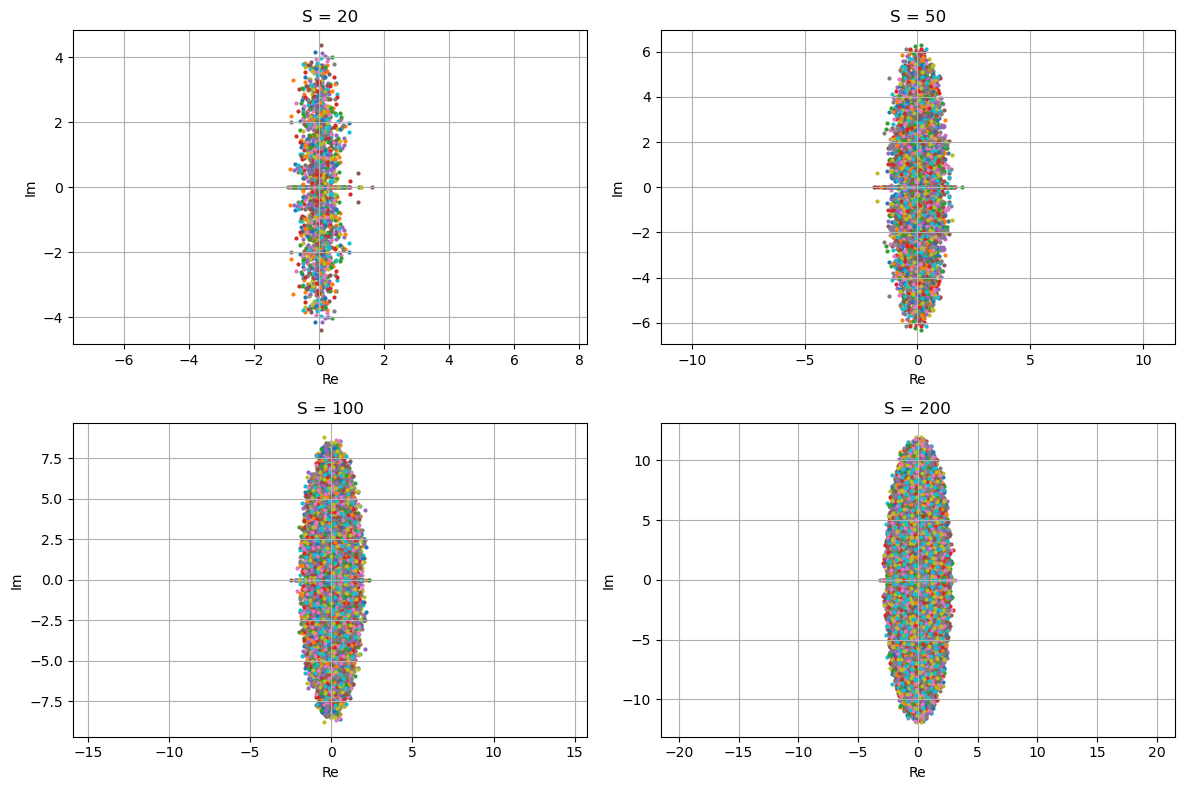

In [7]:
# parameters
C = 0.25
d = 0
sigma = 1

S_list = np.array([20, 50, 100, 200])

plt.figure(figsize=(12, 8))

for idx, S in enumerate(S_list):
    
    plt.subplot(2, 2, idx + 1)

    for _ in range(100):
        # compute predator prey matrix
        M = M_predator_prey(S, C, d, sigma)

        # calculate eigenvalues
        eigenvalues = np.linalg.eigvals(M)

        # Plot the eigenvalues
        plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), s=4)

    plt.title(f'S = {S}')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.grid(True)
    plt.axis('equal')

plt.tight_layout()
plt.show()

Plot the maximum real part eigenvalues as a function of S for the predator prey case.

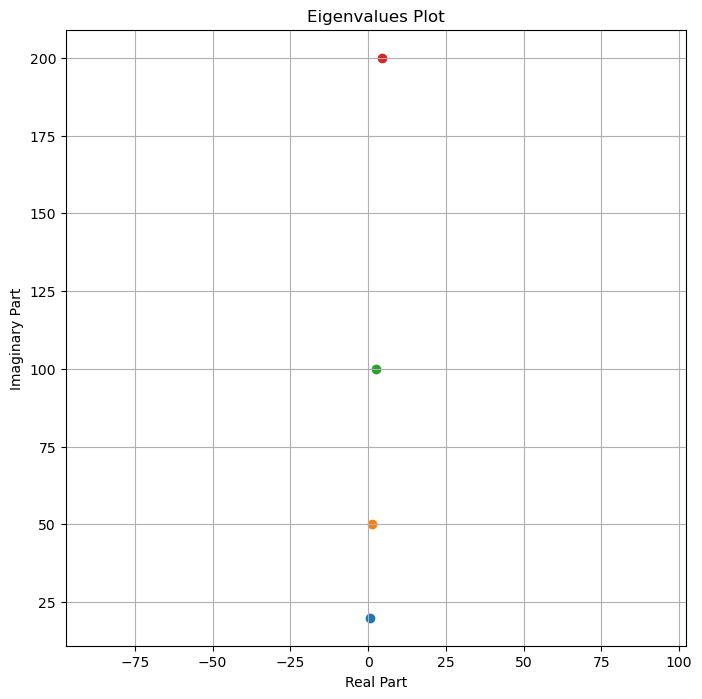

In [8]:
S = 10
C = 0.8
d = 0.4
sigma = 1

S_list = np.array([20, 50, 100, 200])
plt.figure(figsize=(8, 8))

for i in range(4):
    # compute predator prey matrix
    S = S_list[i]
    M = M_predator_prey(S, C, d, sigma)

    # Calculate eigenvalues
    eigenvalues = np.linalg.eigvals(M)

    # Plot the eigenvalues
    plt.scatter(np.max(np.real(eigenvalues)), S)
    plt.title('Eigenvalues Plot')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.grid(True)
    
plt.axis('equal')
plt.show()

#### Competition and Mutualism

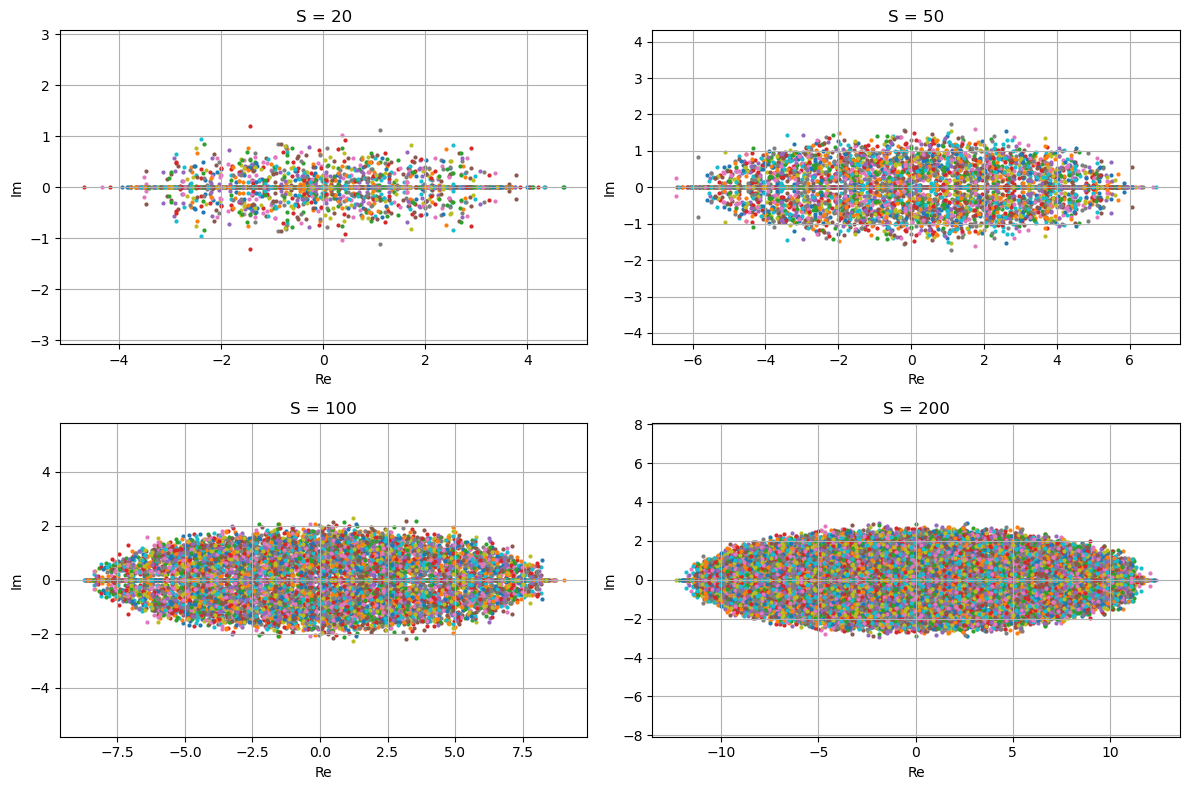

In [9]:
# parameters
C = 0.25
d = 0
sigma = 1

S_list = np.array([20, 50, 100, 200])

plt.figure(figsize=(12, 8))

for idx, S in enumerate(S_list):
    
    plt.subplot(2, 2, idx + 1)

    for _ in range(100):
        # compute mixture
        M = M_comp_mutual(S, C, d, sigma)

        # calculate eigenvalues
        eigenvalues = np.linalg.eigvals(M)

        # Plot the eigenvalues
        plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), s=4)

    plt.title(f'S = {S}')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.grid(True)
    plt.axis('equal')

plt.tight_layout()
plt.show()

#### Random 

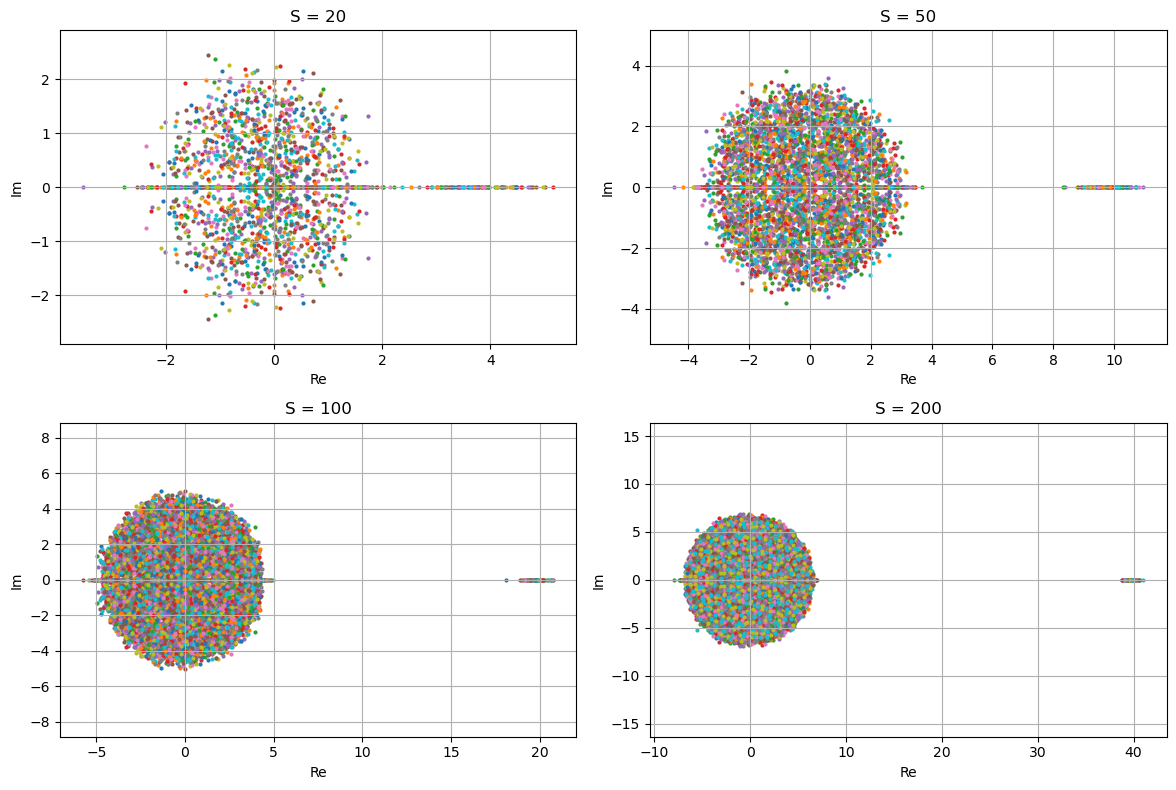

In [10]:
# parameters
C = 0.25
d = 0
sigma = 1

S_list = np.array([20, 50, 100, 200])

plt.figure(figsize=(12, 8))

for idx, S in enumerate(S_list):
    
    plt.subplot(2, 2, idx + 1)

    for _ in range(100):
        # compute mixture
        M = M_random(S, C, d, sigma)

        # calculate eigenvalues
        eigenvalues = np.linalg.eigvals(M)

        # Plot the eigenvalues
        plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), s=4)

    plt.title(f'S = {S}')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.grid(True)
    plt.axis('equal')

plt.tight_layout()
plt.show()

##### Stability profiles
Starting from some fixed values of $d$, $\sigma$ and $C$, I systematically varied $S$ in order obtain 
$K$ spanning in a small range around the critical value for stability (indicated with dashed red line):
 - $K_{predator-prey} = \sqrt{SC}\sigma(1-\frac{-E(m_{ij}m_{ji})/C}{\sigma^2})$
 - $K_{mixture} = \sqrt{SC}\sigma(1+\frac{-E(m_{ij}m_{ji})/C}{\sigma^2})$
 - $K_{random} = \sqrt{SC}\sigma$
 
where $E(m_{ij}m_{ji})$ is computed using the function `compute_expected_value`, and remembering that it holds that $\mathbb{E}[X]^2 = E(m_{ij}m_{ji})/(-C) $. <br>
The profiles were obtained computing the probability of stability out of 500 matrices, meaning running the algorithm many times and counting the number of times we obtained a stable system normalized by the total realizations.To assess whether the generated matrix is stable, I used the function `is_stable`, which returns True if all eigenvalues of the matrix have negative real parts.

In the following part I show the stability profiles of predator-prey and mixture of mutialism and competition and i compare them woth the random matrix case.

##### Predator prey

In [45]:
#predator prey
C = 0.5
sigma = 0.7
d = 1
realiz = 500

S_list = np.array([5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100, 150, 200, 250])
numpoints = len(S_list)
stable_list = np.zeros(realiz)
k_list = np.zeros(numpoints)
P_stable = np.zeros(numpoints) # probability of stability out of realiz-matrices.

plt.figure(figsize=(8, 8))
for i in range(numpoints):
    for j in range(realiz):
        # compute predator prey matrix
        S = S_list[i]
        M = M_predator_prey(S, C, d, sigma)
        stable_list[j] = is_stable(M)
        
    # probability of stability for each value of S
    P_stable[i] = np.count_nonzero(stable_list)/realiz
    
    # compute the value of x axes.
    E = compute_expected_value(M)
    k_list[i] = np.sqrt(S*C)*sigma*(1-(-E/C)/sigma**2) 


<Figure size 800x800 with 0 Axes>

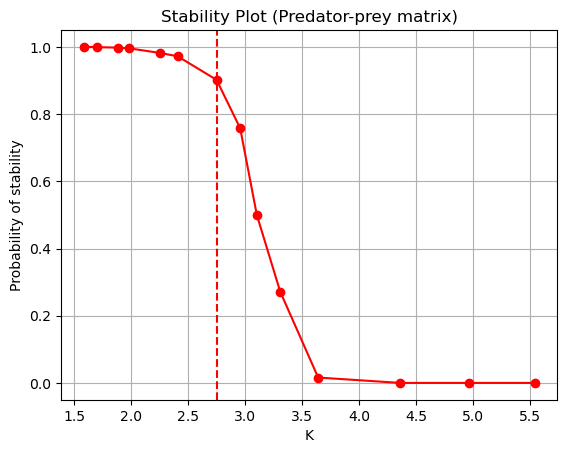

In [47]:
plt.plot(k_list, P_stable, 'ro-' )
plt.title('Stability Plot (Predator-prey matrix)')
plt.xlabel('K')
plt.ylabel('Probability of stability')
plt.axvline(x=np.pi/(np.pi-2), color='red', linestyle='--')
plt.grid(True)
plt.savefig("predator_prey_stability.png")

Numerical simulations, as expected, showed that predator-prey matrices are more stable than random ones (meaning that stable predator-prey systems can be much larger and more complex than random ones).

##### Mixture of Competition and Mutualism

In [67]:
# Mixture of Competition and Mutualism Matrices
C = 0.3
sigma = 0.7
d = 1
realiz = 500

S_list = np.array([2,4,5,10, 12, 15, 28, 20, 25, 30, 50, 100, 200, 250])
numpoints = len(S_list)
stable_list = np.zeros(realiz)
k_list = np.zeros(numpoints)
P_stable = np.zeros(numpoints) # probability of stability out of realiz-matrices.

plt.figure(figsize=(8, 8))
for i in range(numpoints):
    for j in range(realiz):
        # compute predator prey matrix
        S = S_list[i]
        M = M_comp_mutual(S, C, d, sigma)
        stable_list[j] = is_stable(M)
        
    # probability of stability for each value of S
    P_stable[i] = np.count_nonzero(stable_list)/realiz
    
    # compute the value of x axes.
    E = compute_expected_value(M)
    k_list[i] = np.sqrt(S*C)*sigma*(1+(-E/C)/sigma**2) 

<Figure size 800x800 with 0 Axes>

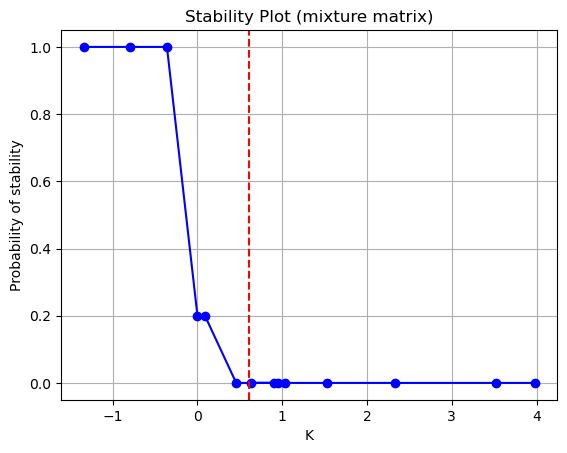

In [69]:
plt.plot(k_list, P_stable, 'bo-' )
plt.title('Stability Plot (mixture matrix)')
plt.xlabel('K')
plt.ylabel('Probability of stability')
plt.axvline(x=np.pi/(np.pi+2), color='red', linestyle='--')
plt.grid(True)
#plt.xlim((0,3.5))
plt.savefig("mix_stability.png")

##### Random

In [10]:
#random
C = 0.25
sigma = 0.5
d = 1
realiz = 500

S_list = np.array([2,4,8,10,15,18, 20,22,23,25,30,35,40,50,100,200])
numpoints = len(S_list)
stable_list = np.zeros(realiz)
k_list = np.zeros(numpoints)
P_stable = np.zeros(numpoints) # probability of stability out of realiz-matrices.

plt.figure(figsize=(8, 8))
for i in range(numpoints):
    for j in range(realiz):
        # compute predator prey matrix
        S = S_list[i]
        M = M_random(S, C, d, sigma)
        stable_list[j] = is_stable(M)
        
    # probability of stability for each value of S
    P_stable[i] = np.count_nonzero(stable_list)/realiz
    k_list[i] = np.sqrt(S*C)*sigma

<Figure size 800x800 with 0 Axes>

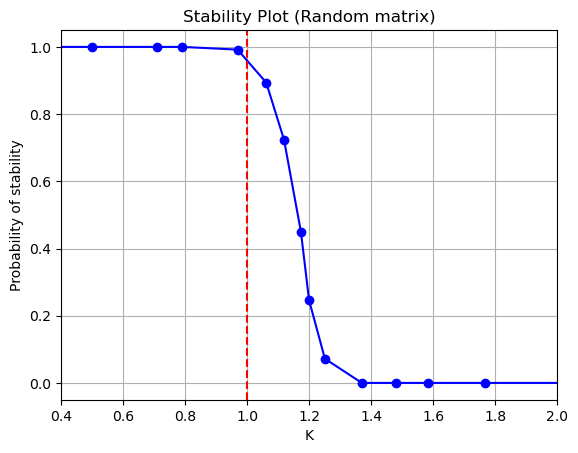

In [13]:
plt.plot(k_list, P_stable, 'bo-' )
plt.title('Stability Plot (Random matrix)')
plt.xlabel('K')
plt.ylabel('Probability of stability')
plt.axvline(x=1, color='red', linestyle='--')
plt.grid(True)
plt.xlim((0.4,2))
plt.savefig("random_stability.png")

### Optional
how the eigenvalues of the Jacobian of a GLV with constant growth rate set to 1 and random positive $N^*$ (for example taken from a Uniform distribution between 1 and 10) and random interactions are distributed? Does the circular or elliptic law still hold? And what about the stability-complexity paradox?

To find a solution I randomly generated $\alpha_{i,j}$, and then I computed $m_{i,j} = \Pi_{i,j}N_i^∗ \alpha_{i,j}$, where $N^*$ is the stationary solution. I computed the eigenvalues of $M$ and plot the Imaginary part vs Real part.<br>
As one can see from the plot, there is an extreme real eigenvalue of the matrix. The remaining eigenvalues are contained in a circle.

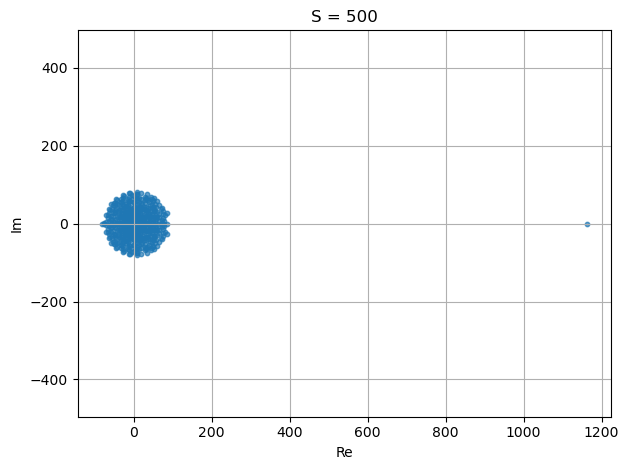

In [44]:
#parameters
C = 0.5
d = 0
sigma = 1
S = 500

alpha = M_random(S, C, d, sigma)
np.fill_diagonal(alpha, np.linspace(1, 1, S))

N = np.random.uniform(1, 10, S)
M = N * alpha

# calculate eigenvalues
eigenvalues = np.linalg.eigvals(M)

# Plot the eigenvalues
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), s=10, alpha = 0.7)
plt.title(f'S = {S}')
plt.xlabel('Re')
plt.ylabel('Im')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()